In [1]:
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.layers.experimental.preprocessing import Rescaling
import matplotlib.pyplot as plt

2024-02-20 14:12:15.687729: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
train_dir = "../data/chest_xray/new_train"
test_dir = "../data/chest_xray/new_test"
val_dir = "../data/chest_xray/new_val"
batch_size = 64
image_size=(128,128)

train_ds = image_dataset_from_directory(train_dir,
                                        label_mode='binary',
                                        batch_size=batch_size,
                                        image_size=image_size,
                                        color_mode="grayscale")

test_ds = image_dataset_from_directory(test_dir,
                                        label_mode='binary',
                                        batch_size=batch_size,
                                        image_size=image_size,
                                        color_mode="grayscale")

val_ds = image_dataset_from_directory(val_dir,
                                        label_mode='binary',
                                        batch_size=batch_size,
                                        image_size=image_size,
                                        color_mode="grayscale")



Found 4684 files belonging to 2 classes.
Found 587 files belonging to 2 classes.
Found 585 files belonging to 2 classes.


In [3]:
input_shape = image_size + (1,)
baseline_model = Sequential([
    # Rescaling layer to normalize pixel values
    Rescaling(1./255, input_shape=input_shape),
    
    # Convolutional layer 1
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    
    # Flattening the 3D outputs to 1D
    Flatten(),
    
    # Fully connected layer and output
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')  # Use sigmoid for binary classification
])

baseline_model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

baseline_model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 128, 128, 1)       0         
                                                                 
 conv2d (Conv2D)             (None, 126, 126, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 127008)            0         
                                                                 
 dense (Dense)               (None, 64)                8128576   
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                        

In [4]:
baseline_history = baseline_model.fit(train_ds,
                                      epochs=20,
                                      validation_data=val_ds)

Epoch 1/20
74/74 [==============================] - 21s 266ms/step - loss: 0.4004 - accuracy: 0.8664 - val_loss: 0.1473 - val_accuracy: 0.9368
Epoch 2/20
74/74 [==============================] - 21s 269ms/step - loss: 0.1635 - accuracy: 0.9387 - val_loss: 0.1912 - val_accuracy: 0.9231
Epoch 3/20
74/74 [==============================] - 21s 268ms/step - loss: 0.1103 - accuracy: 0.9629 - val_loss: 0.1240 - val_accuracy: 0.9538
Epoch 4/20
74/74 [==============================] - 21s 273ms/step - loss: 0.0853 - accuracy: 0.9699 - val_loss: 0.1430 - val_accuracy: 0.9470
Epoch 5/20
74/74 [==============================] - 21s 277ms/step - loss: 0.0737 - accuracy: 0.9733 - val_loss: 0.1302 - val_accuracy: 0.9573
Epoch 6/20
74/74 [==============================] - 22s 287ms/step - loss: 0.0531 - accuracy: 0.9851 - val_loss: 0.1353 - val_accuracy: 0.9504
Epoch 7/20
74/74 [==============================] - 22s 281ms/step - loss: 0.0444 - accuracy: 0.9883 - val_loss: 0.1727 - val_accuracy: 0.9316

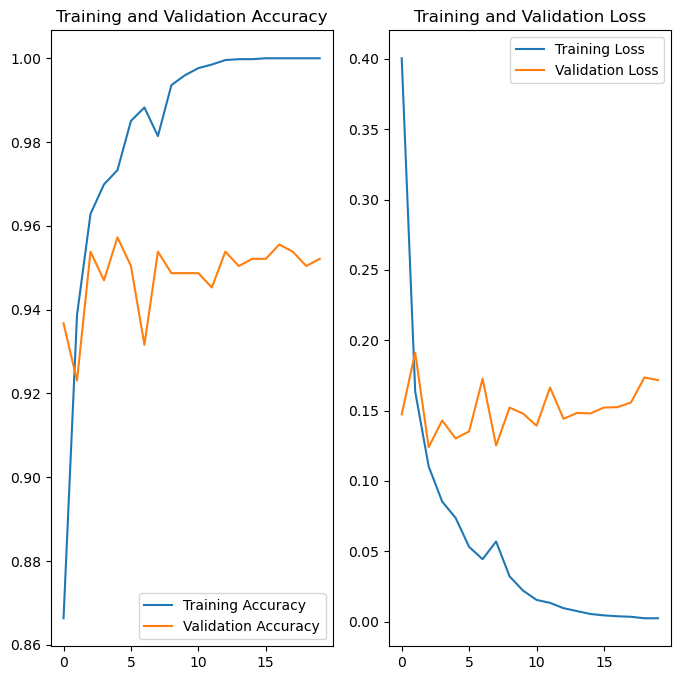

In [7]:
def visualize_training_results(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    epochs_range = range(20)
    
    plt.figure(figsize=(8, 8))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')
    
    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()
visualize_training_results(baseline_history)

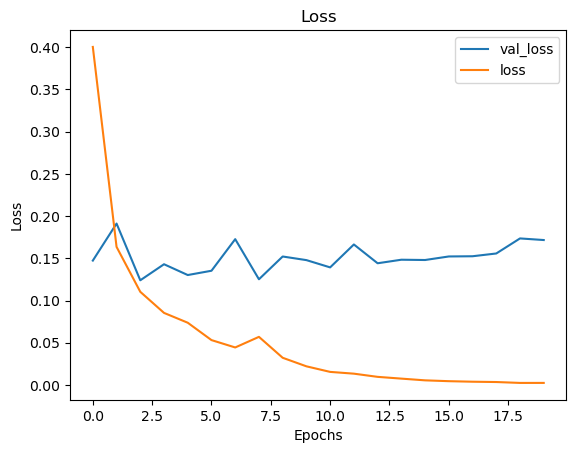

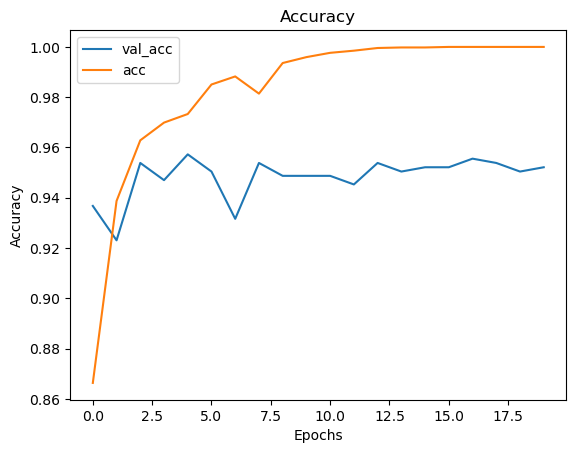

In [10]:
def visualize_training_results2(results):
    history = results.history
    plt.figure()
    plt.plot(history['val_loss'])
    plt.plot(history['loss'])
    plt.legend(['val_loss', 'loss'])
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.show()
    
    plt.figure()
    plt.plot(history['val_accuracy'])
    plt.plot(history['accuracy'])
    plt.legend(['val_acc', 'acc'])
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.show()
visualize_training_results2(baseline_history)